In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class SchellingModel:
    ''' The Schelling model of segregation.
        
        Args:
            height (int): The height of the table.
            width (int): The width of the table.

        Attributes:
            table (ndarray): table of colors.
            unhappy (list): list of unhappy cells.
    '''
    
    def __init__(self, height, width):
        table = self.create_table(height, width)
        self._table = table
        self._unhappy = self.get_unhappy(table)
        self._empties = self.get_empty(table)
         
    @property
    def table(self):
        return self._table
    
    @property
    def unhappy(self):
        return self._unhappy
    
    @staticmethod
    def create_table(height: 'int', width: 'int') -> 'ndarray':
        ''' Creates table with specified height and width, then fills it with colors.
        Blue is 1, red is -1, white is 0.
        Static method.
        
        Args:
            height (int): The height of the table.
            width (int): The width of the table.

        Returns:
            Table (ndarray).
        '''
        
        colored = height*width * 45 // 100
        uncolored = height*width - 2*colored

        cells = [-1]*colored + [1]*colored + [0]*uncolored
        random.shuffle(cells)
        table = np.array(cells).reshape(height, width)
        return table
    
    @staticmethod
    def get_empty(table: 'ndarray') -> 'list':
        ''' Returns list of empty cells in table. Static method.
        
        Args:
            table (ndarray): The table.

        Returns:
            List of empty cells (`list` of `int`).
        '''
        
        res = np.where(table == 0)    
        return list(zip(res[0],res[1]))

    @staticmethod
    def get_unhappy(table: 'ndarray') -> 'list':
        ''' Returns list of unhappy cells in table.
        The cell is unhappy if it has less then 2 neighbours with same color.
        Static method.
        
        Args:
            table (ndarray): The table.

        Returns:
            List of unhappy cells (`list` of `int`).
        '''
        
        unhappy = []
        for i,j in np.ndindex(table.shape):
            if table[i,j] == 0:
                continue
                
            friends = 0
            if i != 0 and j != 0 and table[i,j] == table[i-1,j-1]:
                friends += 1
            if i != 0 and table[i,j] == table[i-1,j]:
                friends += 1
            if i != 0 and j != table.shape[0]-1 and table[i,j] == table[i-1,j+1]:
                friends += 1
            if j != 0 and table[i,j] == table[i,j-1]:
                friends += 1
            if j != table.shape[0]-1 and table[i,j] == table[i,j+1]:
                friends += 1
            if i != table.shape[1]-1 and j != 0 and table[i,j] == table[i+1,j-1]:
                friends += 1
            if i != table.shape[1]-1 and table[i,j] == table[i+1,j]:
                friends += 1
            if i != table.shape[1]-1 and j != table.shape[0]-1 and table[i,j] == table[i+1,j+1]:
                friends += 1

            if friends < 2:
                unhappy.append((i,j))
        return unhappy
    
    def step(self, count=1, print_steps=False):
        ''' Returns list of unhappy cells in table.
        The cell is unhappy if it has less then 2 neighbours with same color.
        
        Args:
            count (int): The table.

        Returns:
            List of unhappy cells (`list` of `int`).
        '''
        
        table = self._table
        unhappy = self._unhappy
        empties = self._empties
        
        if count < 1:
            print('Wrong steps count')
            return
        
        for i in range(count):
            if not len(unhappy):
                print('Everyone is happy')
                return
            
            unhappy_cell = random.choice(unhappy)
            empty_cell = random.choice(empties)
            
            table[empty_cell[0], empty_cell[1]] = table[unhappy_cell[0], unhappy_cell[1]]
            table[unhappy_cell[0], unhappy_cell[1]] = 0
            
            unhappy = self.get_unhappy(table)
            empties = self.get_empty(table)
            
            if (print_steps):
                print(f'{unhappy_cell} is moved to {empty_cell}')
        
        self._table = table
        self._unhappy = unhappy
        self._empties = empties

    def plot_table(self):
        ''' Plots colored table.
        '''
        
        table = self._table
        fig, ax = plt.subplots()
        im = ax.imshow(table, cmap='RdYlBu')

        ax.set_xticklabels(['']*table.shape[0]);
        ax.set_yticklabels(['']*table.shape[1]);
        ax.set_xticks(np.arange(-.5, table.shape[0], 1), minor=True);
        ax.set_yticks(np.arange(-.5, table.shape[1], 1), minor=True);

        ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

        fig.tight_layout()
        plt.show()

[[-1  1 -1  1  1  1  1  1 -1  1]
 [ 1 -1  1  1  1 -1  1  1 -1  1]
 [-1  1 -1  1  1  0 -1  1  1 -1]
 [-1 -1 -1 -1 -1 -1 -1  1  0  0]
 [-1  1 -1  1  1 -1  1  1 -1 -1]
 [ 0  0 -1 -1  1  1  1 -1 -1 -1]
 [ 0 -1  1 -1 -1  1  1 -1 -1  1]
 [ 1 -1  0 -1  0  0  1 -1  1 -1]
 [ 1  1 -1 -1  1 -1  1 -1  1  1]
 [ 1  1 -1  0 -1 -1 -1  1  1 -1]]


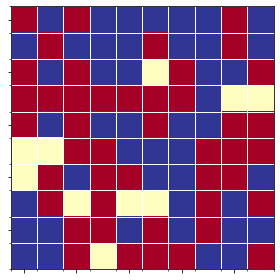

In [3]:
schelling = SchellingModel(10,10)
print(schelling.table)
schelling.plot_table()

(0, 9) is moved to (5, 1)
(0, 0) is moved to (3, 8)
(4, 1) is moved to (7, 2)


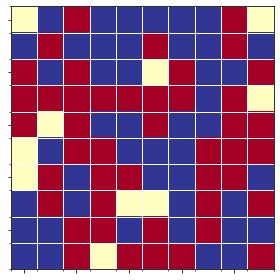

In [4]:
schelling.step(count=3, print_steps=True)
schelling.plot_table()

Everyone is happy


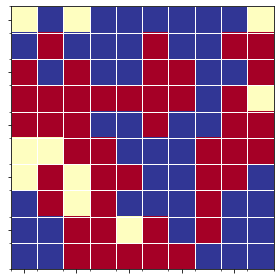

In [5]:
schelling.step(count=35)
schelling.plot_table()